# Quick Start

To get started and check everything is working, run the following Python code (e.g. in a Python terminal
or in a Jupyter notebook).

## Obtaining example data

Some example photoacoustic data, provided by PATATO, can be downloaded at the following link. The following 
folder structure is suggested for following on with this quickstart guide. 

[Link to dataset](https://doi.org/10.17863/CAM.93181).

```
.
├── analysis_code.ipynb
└── dataset/
    └── invivo_oe.hdf5
```

## Option 1: Analysis in Python

PATATO provides a Python API for accessing photoacoustic imaging datasets. It provides interfaces to obtain NumPy arrays and some basic visualisation code.

In [1]:
import patato as pat
import matplotlib.pyplot as plt

In [2]:
# Load the photoacoustic data
pa_data = pat.PAData.from_hdf5("dataset/invivo_oe.hdf5")

The example dataset contains the raw time series. The raw data as a NumPy array can be obtained as follows. The shape of the NumPy array is (frames, wavelengths, detectors, samples).

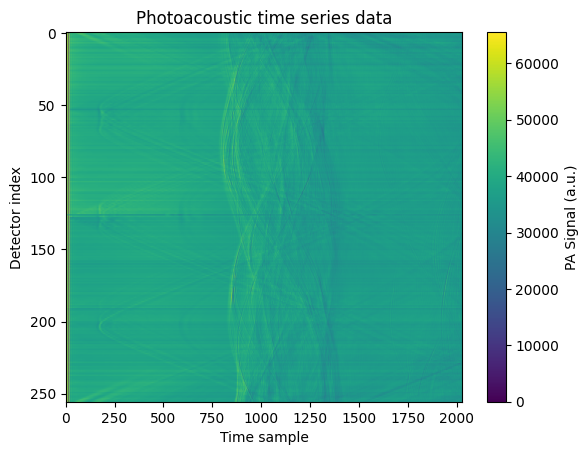

In [3]:
# Obtain time series data:
ts = pa_data.get_time_series()
raw_data = ts.raw_data

# Make an image of the time series data
plt.imshow(raw_data[0, 0], aspect="auto")
plt.title("Photoacoustic time series data")
plt.ylabel("Detector index")
plt.xlabel("Time sample")
plt.colorbar(label="PA Signal (a.u.)")
plt.show()

The example dataset also contains some pre-computed scan reconstructions. The reconstructed images can be obtained as follows, and they can be visualised.

The function `get_scan_reconstructions` returns a dictionary with all saved reconstructions, indexed by the reconstruction type and the number.

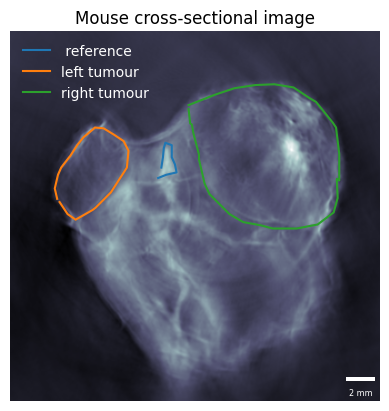

In [4]:
# The saved reconstructed images can be obtained as follows:
reconstruction = pa_data.get_scan_reconstructions()["Reference Backprojection", "0"]

# Show an image of the reconstruction
reconstruction.imshow()

# Overlay the regions of interest:
for (name, _), roi in pa_data.get_rois().items():
    plt.plot(*roi.points.T, label =" ".join(name.split("_")[::-1]))
plt.legend(frameon=False, labelcolor="white")

plt.title("Mouse cross-sectional image")
plt.show()

Many more features are included in PATATO, see the examples and API Reference for more details.

## Option 2: Command Line

PATATO can also be run from the command line. To do so, we recommend having a data folder only containing
processed data (hdf5 format as generated by PATATO). The HDF5 files can be generated by PATATO by converting another
format into HDF5 using the appropriate command line tool. 

As highlighted in the introduction, iThera Medical GmbH (shortened to ithera in the code) data is currently supported. PATATO
handles data from the MSOT inVision 256 and MSOT Acuity Echo systems. This project is designed to be extendable to other 
formats by the community.

### 1. Convert iThera Data to HDF5 Format

Converts all scans within a folder to hdf5 format. Outputs hdf5 format files in the second folder given.

```
patato-import-ithera /path/to/itherastudyfolder /path/to/processeddatafolder
```

### 2. Set speed of sounds for each scan

This provides a graphical user interface for setting the speed of sound of photoacoustic images. On opening, the interface asks you to select a folder containing HDF5 files, which will be reconstructed by backprojection. You can adjust the slider to set the optimal speed of sound, then save that to either one image or all of the images at once.

```
patato-set-speed-of-sound
```

![Image of speed of sound setting interface.](speedofsoundset.png)

### 3. Reconstruct scan(s)

Once you have set the speed of sound for a desired scan, you
can then run the reconstruction algorithm. By default this
uses backprojection, but you
can change this preset by passing a different json file on the command
line as optional argument `-p /path/to/presets/___.json`.

The argument here can now be either a file or a folder.

```
patato-reconstruct /path/to/processeddatafolder
```

### 4. Spectral unmixing

By default, this downscales the MSOT images
by a factor of 2, applies linear unmixing into Hb/HbO2 using reference spectra. sO2 is estimated
by the ratio of oxyhaemoglobin to total haemoglobin.
Like the reconstruction command, you can specify a preset, which gives you more
choice over chromophores e.g. melanin/ICG etc. You can also specify the
wavelengths to include in the unmixing. This will automatically run for all scans
unless you include the `-f` option, which will filter
out scans which have a specific string in their name (include this name after the -f). For example,
if your data includes static scans and dynamic scans in the same folder, label them with something distinctive 
and include that here.

```
patato-unmix /path/to/processeddatafolder
```

### 5. Draw regions of interest

To draw regions of interest, use the `patato-draw-roi` command. This gives an interactive interface
with which you can draw polygons around a region that can be analysed later.

```
patato-draw-roi
```

This brings up the following interface:
Image here:
![Image of ROI drawing interface](RegionOfInterestWindow.png)